2. Import Libraries and Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings("ignore")



 Step 2: Data Preprocessing
Load and Explore Raw Data

In [10]:
from zipfile import ZipFile

# Specify the path to the zip file
zip_path = r"C:\Users\USER\Downloads\diabetes_binary_health_indicators_BRFSS2015.csv.zip"

# Open the zip file and read the desired CSV file
with ZipFile(zip_path, 'r') as z:
    with z.open('diabetes_binary_health_indicators_BRFSS2015.csv') as f:
        df = pd.read_csv(f)


# Basic overview
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("\nTarget distribution:\n", df['Diabetes_binary'].value_counts(normalize=True))
df.describe()

Shape: (253680, 22)
Missing values:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Target distribution:
 Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


3. Exploratory Data Analysis (EDA)
We’ll look at:
- Class distribution
- Feature correlations
- Basic summary statistics

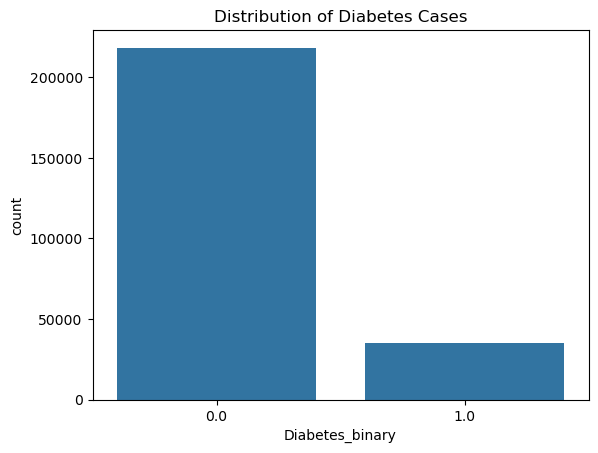

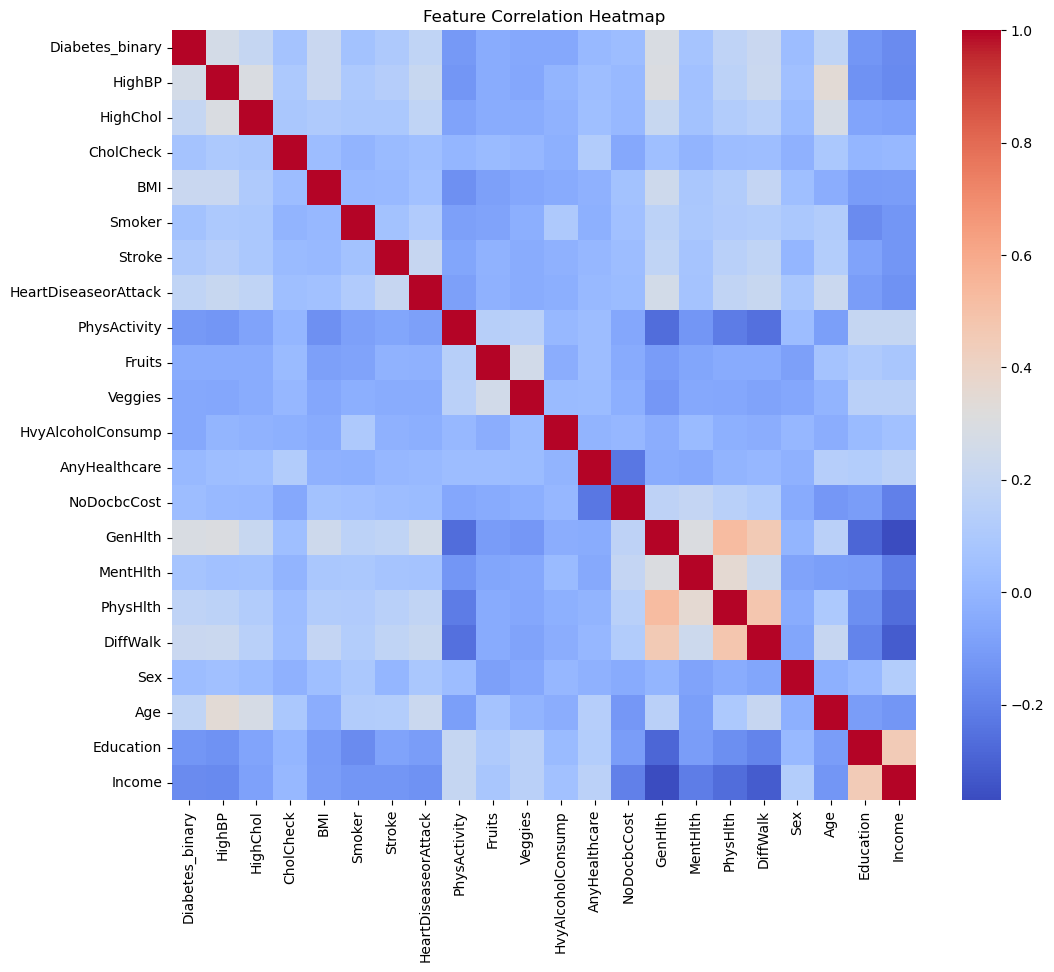

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
# Target class distribution
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribution of Diabetes Cases')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Summary stats
df.describe()


4. Data Preprocessing
   Steps:
- Split features and labels
- Standardize features
- Balance classes using SMOTE

In [17]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


5. Model Training & Evaluation
We will train:
- Logistic Regression
- Random Forest
- Gradient Boosting
- Decision Tree
- Naive Bayes

Metrics:
- Accuracy
- ROC AUC
- Confusion Matrix

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("ROC AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results.append((name, acc, auc))



Logistic Regression
Accuracy: 0.7310588142541785
ROC AUC: 0.8259479752148744
Confusion Matrix:
 [[31665 12074]
 [ 1571  5426]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43739
         1.0       0.31      0.78      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736


Random Forest
Accuracy: 0.8507174392935982
ROC AUC: 0.8016606167138949
Confusion Matrix:
 [[41190  2549]
 [ 5025  1972]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     43739
         1.0       0.44      0.28      0.34      6997

    accuracy                           0.85     50736
   macro avg       0.66      0.61      0.63     50736
weighted avg       0.83      0.85      0.84     50736


Gradient Boosting
Accuracy: 0.8402712078208767


6. Compare Model Performance

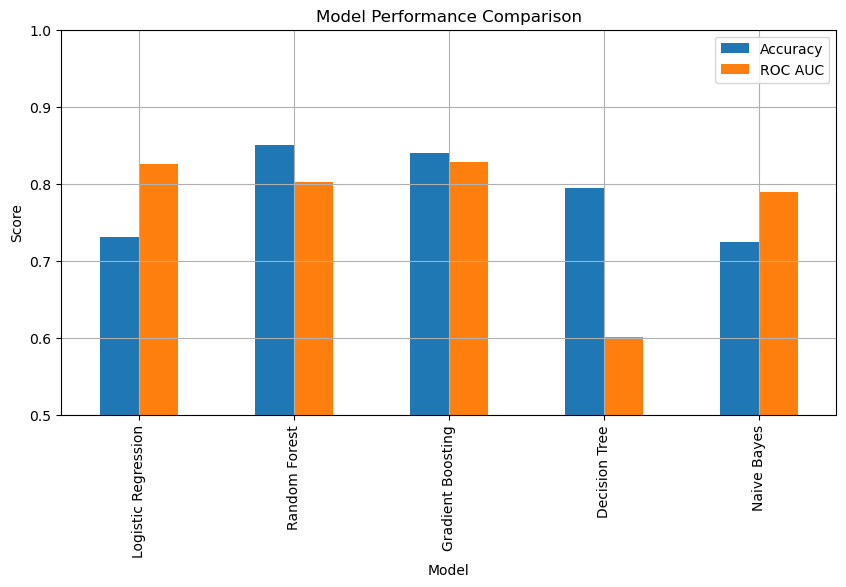

In [23]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10,5), title="Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.show()


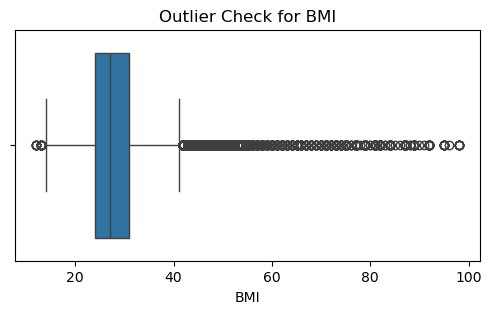

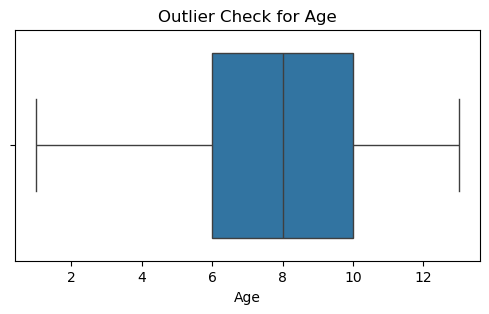

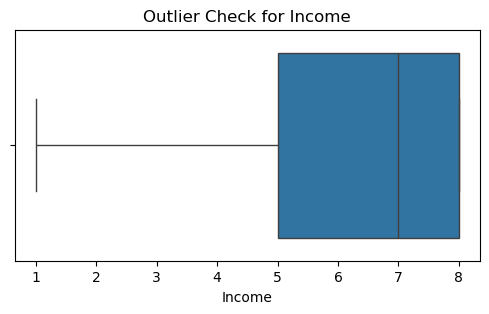

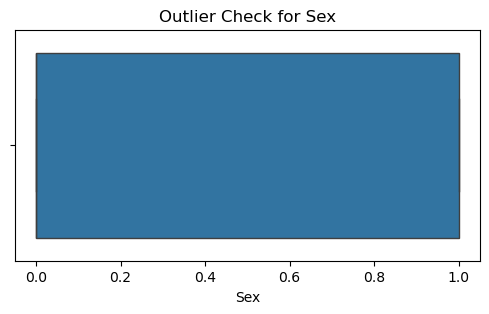

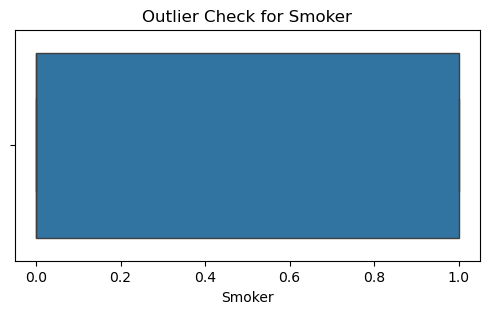

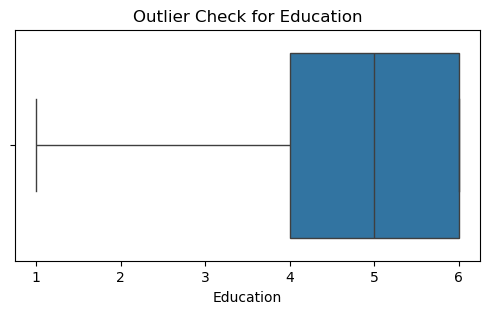

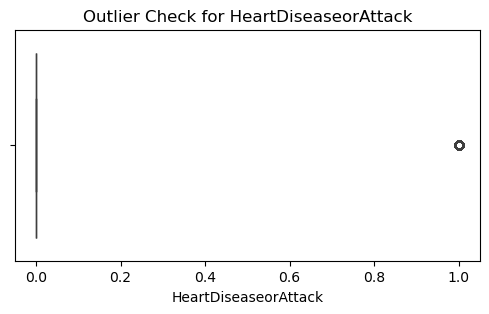

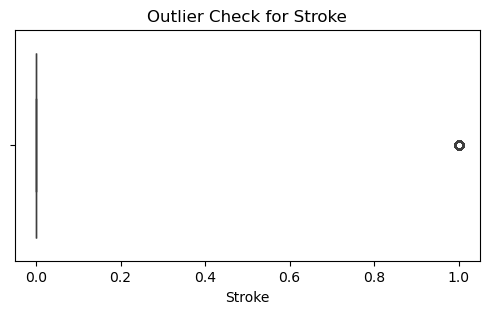

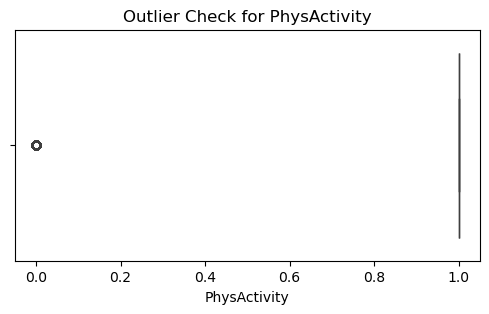

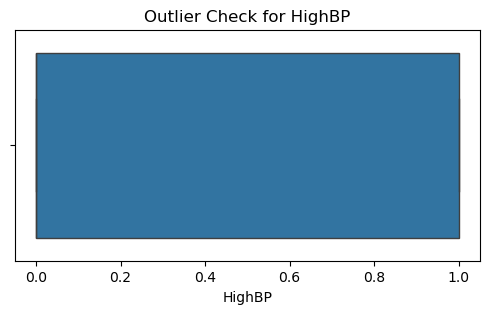

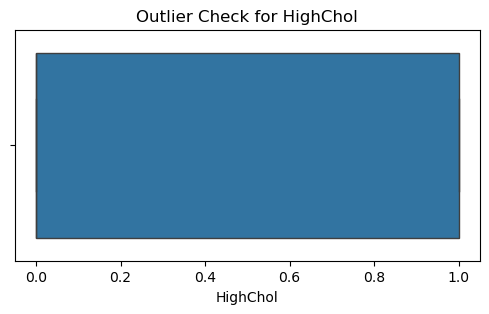

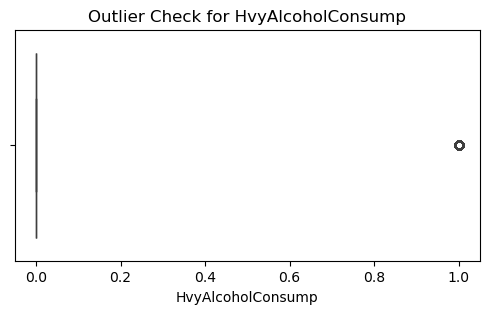

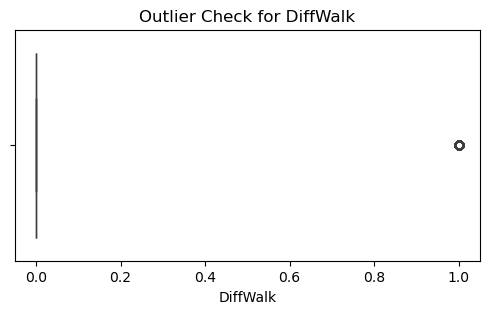

In [25]:
# Boxplots to visually detect outliers
num_cols = ['BMI', 'Age', 'Income', 'Sex', 'Smoker', 'Education', 'HeartDiseaseorAttack', 'Stroke', 'PhysActivity', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'DiffWalk']  # Use your actual numeric columns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check for {col}")
    plt.show()


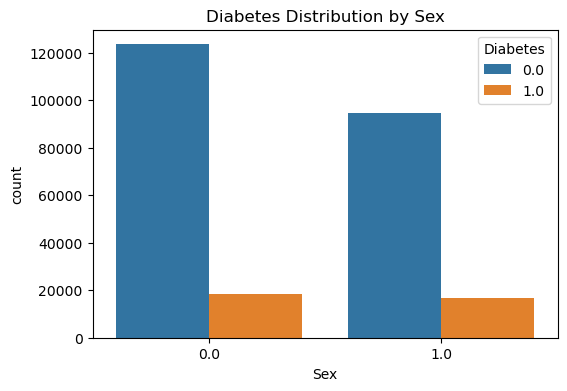

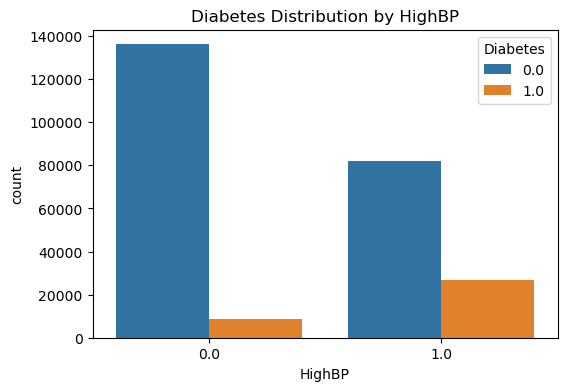

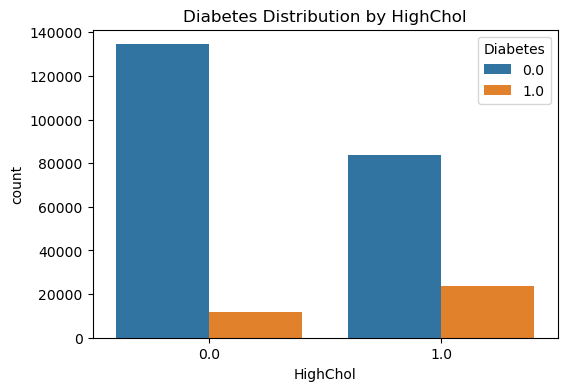

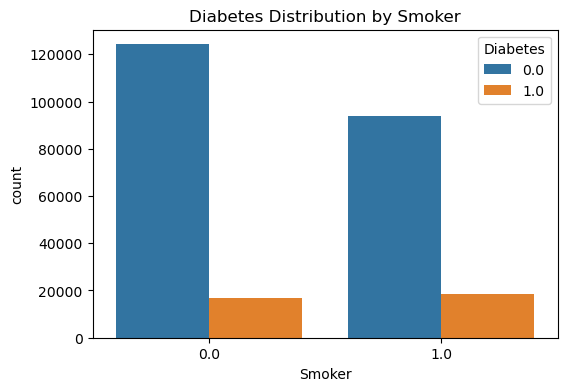

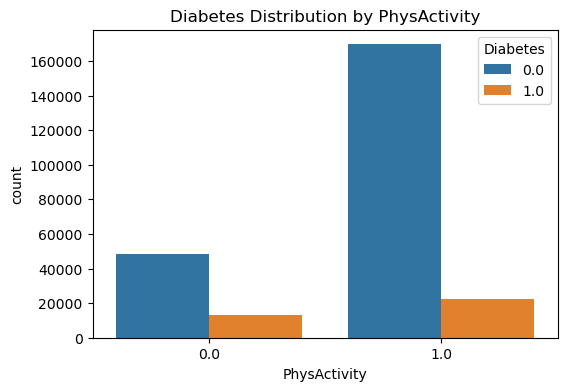

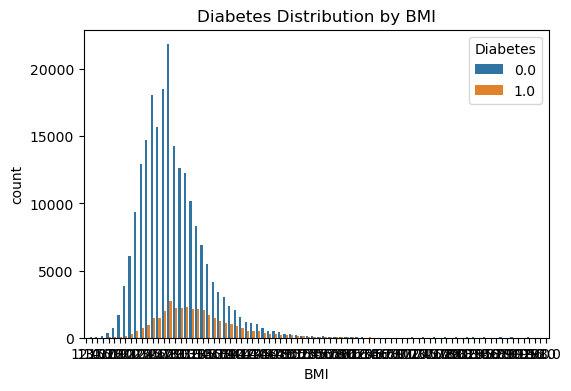

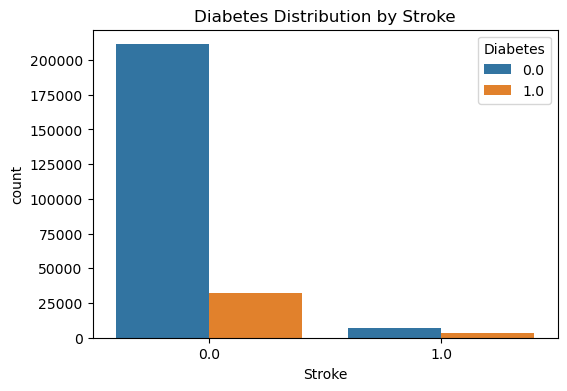

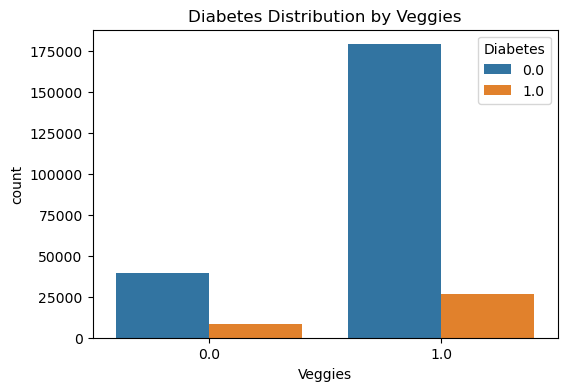

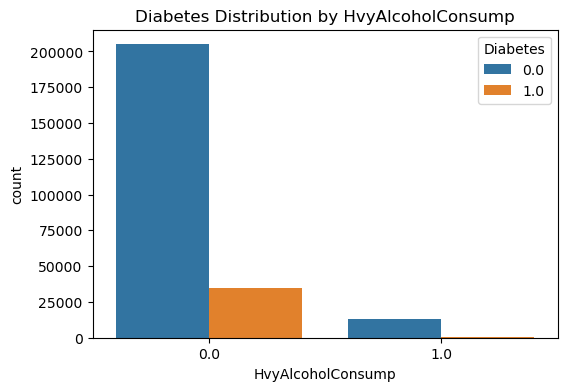

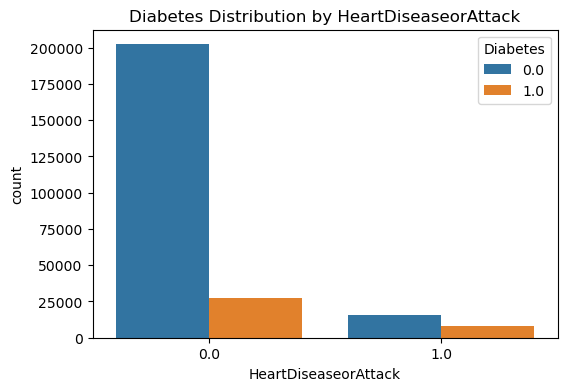

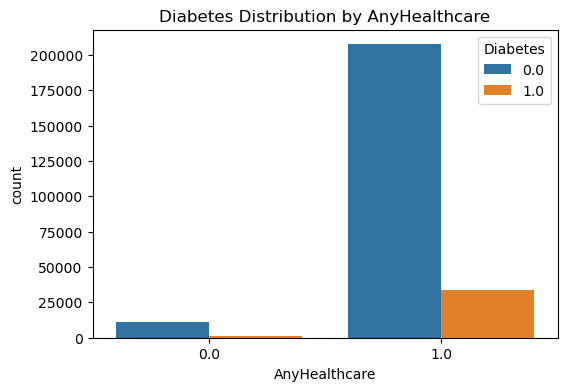

In [27]:
cat_cols = ['Sex', 'HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'BMI', 'Stroke', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack','AnyHealthcare']  # customize
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Diabetes_binary', data=df)
    plt.title(f'Diabetes Distribution by {col}')
    plt.legend(title='Diabetes')
    plt.show()


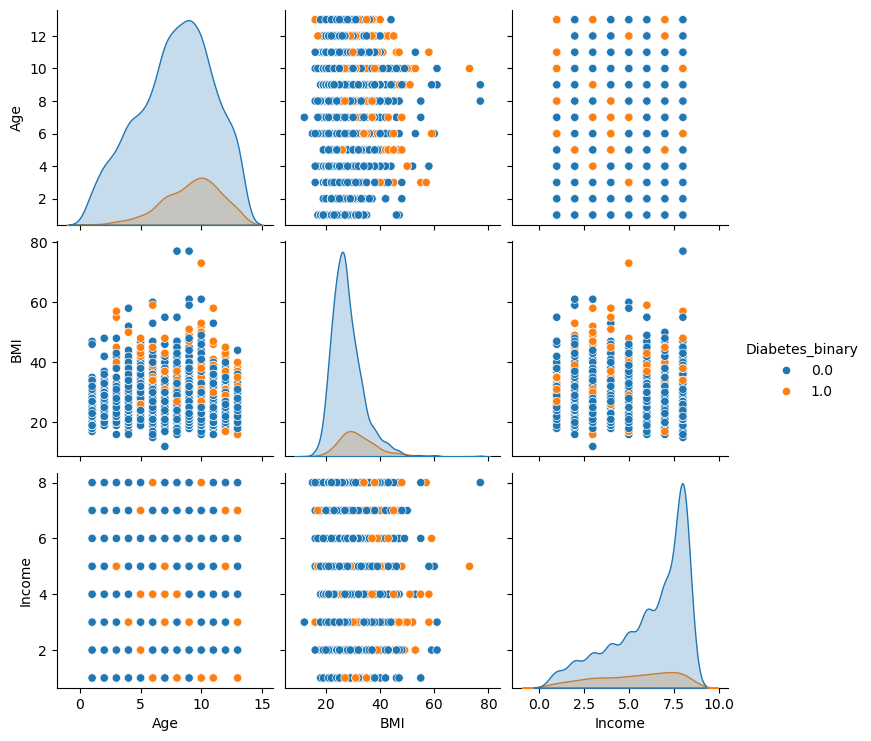

In [29]:
df_sample = df.sample(n=3000, random_state=42)

# Adjust column names as per your dataset
sns.pairplot(df_sample, hue='Diabetes_binary', vars=['Age', 'BMI', 'Income'])
plt.show()

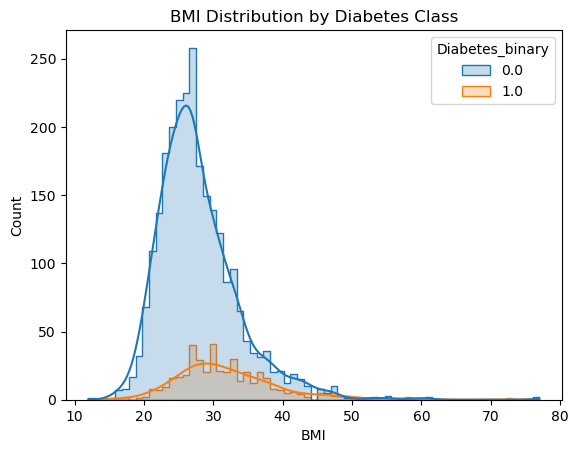

In [31]:
sns.histplot(data=df_sample, x='BMI', hue='Diabetes_binary', kde=True, element="step")
plt.title('BMI Distribution by Diabetes Class')
plt.show()


In [33]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[num_cols]))
outliers = (z_scores > 3).sum()
print("Outliers count per feature (Z-score > 3):")
print(pd.Series(outliers, index=num_cols))


Outliers count per feature (Z-score > 3):
BMI                      2963
Age                         0
Income                      0
Sex                         0
Smoker                      0
Education                4217
HeartDiseaseorAttack    23893
Stroke                  10292
PhysActivity                0
HighBP                      0
HighChol                    0
HvyAlcoholConsump       14256
DiffWalk                    0
dtype: int64


In [35]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers count per feature (IQR method):")
print(outliers_iqr)


Outliers count per feature (IQR method):
BMI                      9847
Age                         0
Income                      0
Sex                         0
Smoker                      0
Education                   0
HeartDiseaseorAttack    23893
Stroke                  10292
PhysActivity            61760
HighBP                      0
HighChol                    0
HvyAlcoholConsump       14256
DiffWalk                42675
dtype: int64


 7. Model Interpretation with SHAP
    We use SHAP to understand which features most influence the predictions of our best model.

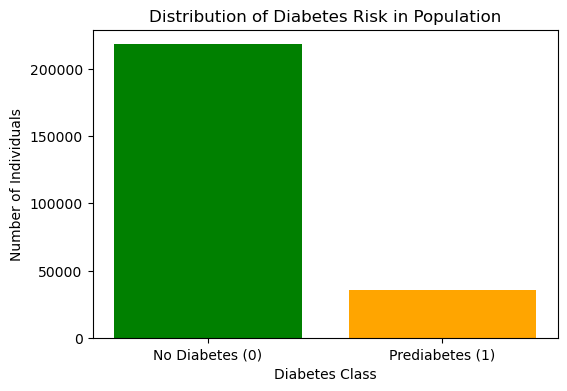

In [40]:
# Get actual class values present in the data
classes_present = sorted(df['Diabetes_binary'].unique())

# Map class numbers to labels
label_map = {
    0: 'No Diabetes (0)',
    1: 'Prediabetes (1)',
    2: 'Diabetes (2)'
}
risk_labels = [label_map[i] for i in classes_present]

# Now get value counts for those classes
risk_counts = df['Diabetes_binary'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(risk_labels, risk_counts, color=['green', 'orange', 'red'][:len(risk_labels)])
plt.title("Distribution of Diabetes Risk in Population")
plt.ylabel("Number of Individuals")
plt.xlabel("Diabetes Class")
plt.show()


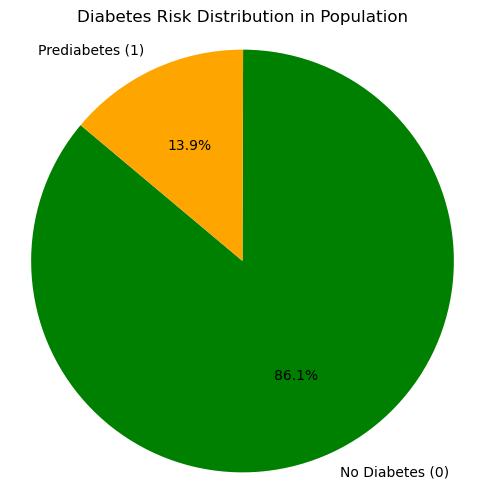

In [42]:
import matplotlib.pyplot as plt

# Using your current dataframe (change df to df_sampled if needed)
classes_present = sorted(df['Diabetes_binary'].unique())

label_map = {
    0: 'No Diabetes (0)',
    1: 'Prediabetes (1)',
    2: 'Diabetes (2)'
}
risk_labels = [label_map[i] for i in classes_present]
risk_counts = df['Diabetes_binary'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(risk_counts, labels=risk_labels, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'][:len(risk_labels)])
plt.title("Diabetes Risk Distribution in Population")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Train and predict with all models
model_lr = LogisticRegression().fit(X_train_bal, y_train_bal)
y_pred_lr = model_lr.predict(X_test_scaled)

model_rf = RandomForestClassifier().fit(X_train_bal, y_train_bal)
y_pred_rf = model_rf.predict(X_test_scaled)

model_dt = DecisionTreeClassifier().fit(X_train_bal, y_train_bal)
y_pred_dt = model_dt.predict(X_test_scaled)

model_gbc = GradientBoostingClassifier().fit(X_train_bal, y_train_bal)
y_pred_gbc = model_gbc.predict(X_test_scaled)

model_nb = GaussianNB().fit(X_train_bal, y_train_bal)
y_pred_nb = model_nb.predict(X_test_scaled)

# Model names and predictions
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'Naive Bayes']
predictions = [y_pred_lr, y_pred_rf, y_pred_dt, y_pred_gbc, y_pred_nb]

# Evaluation
results = []
for name, y_pred in zip(model_names, predictions):
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Results table
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)

# Display
print("🔍 Model Comparison:\n")
display(results_df)


🔍 Model Comparison:



,Model,Accuracy,Precision,Recall,F1 Score
3,Gradient Boosting,0.840271,0.428182,0.471631,0.448857
0,Logistic Regression,0.731059,0.310057,0.775475,0.442993
4,Naive Bayes,0.724436,0.295119,0.718880,0.418452
1,Random Forest,0.850166,0.434311,0.285837,0.344768
2,Decision Tree,0.796377,0.291937,0.334286,0.311680


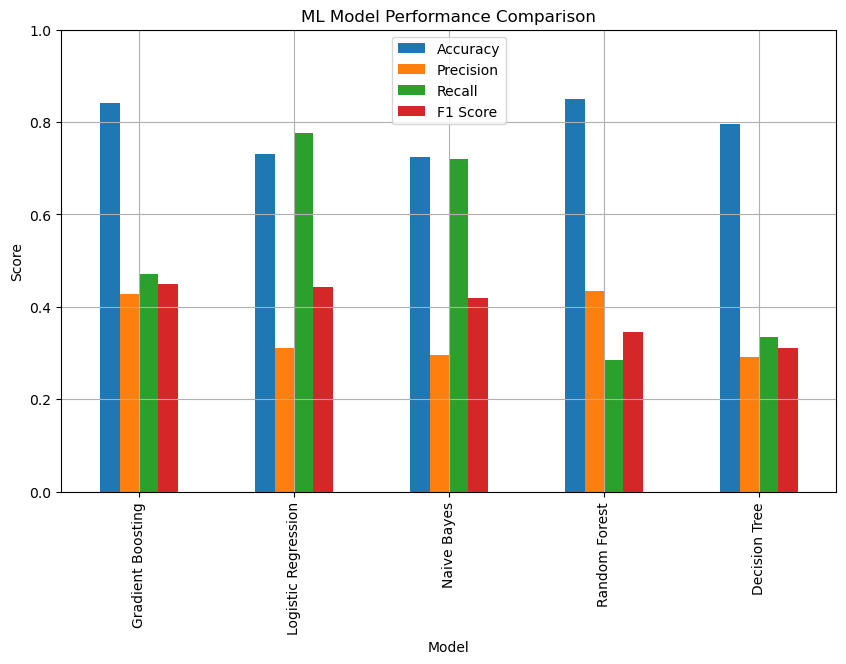

In [52]:
results_df.set_index('Model').plot(kind='bar', figsize=(10,6), title='ML Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


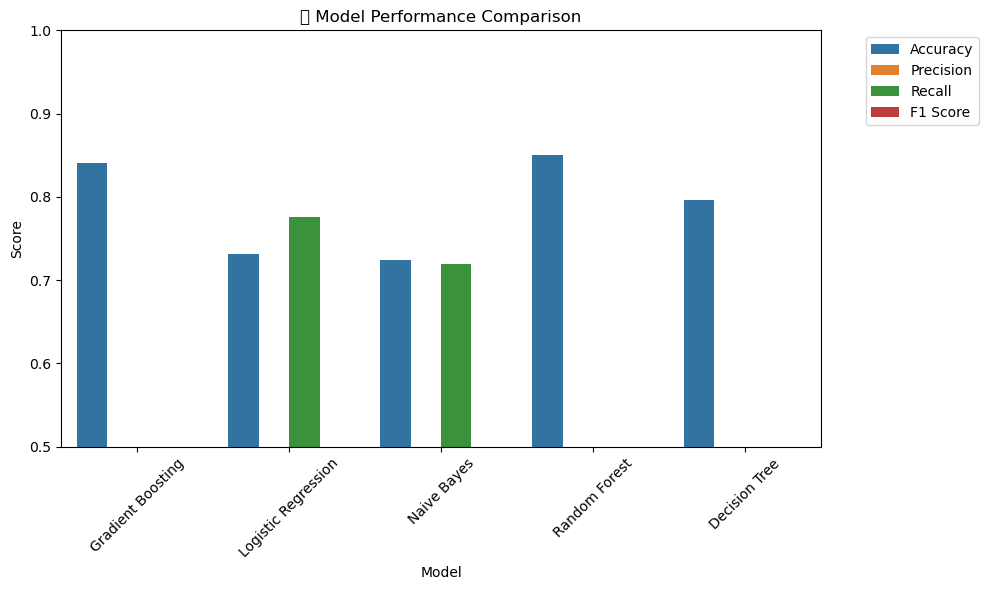

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize model performance metrics
plt.figure(figsize=(10, 6))
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric')
plt.title('📊 Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0.5, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 ##  Final Conclusion

### 🔍 Model Evaluation Summary

| Model               | Accuracy | Precision | Recall  | F1 Score |
|---------------------|----------|-----------|---------|----------|
| **Gradient Boosting** | 0.840    | 0.428     | 0.472   | **0.449** |
| Logistic Regression | 0.731    | 0.310     | **0.775** | 0.443    |
| Naive Bayes         | 0.724    | 0.295     | 0.719   | 0.418    |
| Random Forest       | **0.850**| **0.434** | 0.286   | 0.345    |
| Decision Tree       | 0.796    | 0.292     | 0.334   | 0.312    |

### ✅ Key Insights

- **Gradient Boosting** is the most effective model, achieving the best F1 Score (0.449), which balances both precision and recall.
- **Logistic Regression** yields the **highest recall (0.775)**, making it suitable when it's more important to **catch diabetic cases**, even at the cost of false positives.
- **Random Forest** has the **highest accuracy (0.85)** but a very **low recall**, which makes it risky for medical use cases where false negatives (missed diabetics) are critical.
- **Naive Bayes** and **Decision Tree** perform moderately and can be considered as baseline models.

### 📌 Final Statement

> Based on our evaluation, **Gradient Boosting** stands out as the most balanced model. However, if early detection (high recall) is the top priority in a medical setting, **Logistic Regression** is a strong alternative.
